# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [22]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [23]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lashio
Processing Record 2 of Set 1 | college
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | progreso
Processing Record 5 of Set 1 | port mathurin
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | udachny
Processing Record 9 of Set 1 | lembar
City not found. Skipping...
Processing Record 10 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 11 of Set 1 | maceio
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | san patricio
Processing Record 14 of Set 1 | invercargill
Processing Record 15 of Set 1 | trincomalee
Processing Record 16 of Set 1 | nova vicosa
Processing Record 17 of Set 1 | kwang binh
Processing Record 18 of Set 1 | nazarabad
Processing Record 19 of Set 1 | stanley
Processing Record 20 of Set 1 | longyearbyen
Processing Record 21 of Set 1 | ribeira grande
Processing Re

Processing Record 40 of Set 4 | batang
Processing Record 41 of Set 4 | codrington
Processing Record 42 of Set 4 | georgetown
Processing Record 43 of Set 4 | antalaha
Processing Record 44 of Set 4 | labytnangi
Processing Record 45 of Set 4 | kupjansk
Processing Record 46 of Set 4 | east london
Processing Record 47 of Set 4 | vorgashor
Processing Record 48 of Set 4 | aras-asan
Processing Record 49 of Set 4 | auki
Processing Record 0 of Set 5 | freetown
Processing Record 1 of Set 5 | darwin
Processing Record 2 of Set 5 | ceerigaabo
Processing Record 3 of Set 5 | alderetes
Processing Record 4 of Set 5 | bubaque
Processing Record 5 of Set 5 | port alfred
Processing Record 6 of Set 5 | dedza
Processing Record 7 of Set 5 | charters towers
Processing Record 8 of Set 5 | mthatha
Processing Record 9 of Set 5 | okhotsk
Processing Record 10 of Set 5 | inhambane
Processing Record 11 of Set 5 | bochum
Processing Record 12 of Set 5 | iskateley
Processing Record 13 of Set 5 | linares
Processing Record

Processing Record 30 of Set 8 | kabalo
Processing Record 31 of Set 8 | galle
Processing Record 32 of Set 8 | xining
Processing Record 33 of Set 8 | anibare
City not found. Skipping...
Processing Record 34 of Set 8 | tocopilla
Processing Record 35 of Set 8 | tolanaro
Processing Record 36 of Set 8 | richards bay
Processing Record 37 of Set 8 | setti fatma
City not found. Skipping...
Processing Record 38 of Set 8 | parabel'
Processing Record 39 of Set 8 | pemba
Processing Record 40 of Set 8 | sao joao da barra
Processing Record 41 of Set 8 | berdigestyakh
Processing Record 42 of Set 8 | kitwe
Processing Record 43 of Set 8 | mount isa
Processing Record 44 of Set 8 | cole harbour
Processing Record 45 of Set 8 | margate
Processing Record 46 of Set 8 | rawson
Processing Record 47 of Set 8 | guru har sahai
Processing Record 48 of Set 8 | rahimatpur
Processing Record 49 of Set 8 | alta
Processing Record 0 of Set 9 | leticia
Processing Record 1 of Set 9 | keflavik
Processing Record 2 of Set 9 | 

Processing Record 19 of Set 12 | oliver
Processing Record 20 of Set 12 | kayangel
Processing Record 21 of Set 12 | madang
Processing Record 22 of Set 12 | illizi
Processing Record 23 of Set 12 | sehwan
Processing Record 24 of Set 12 | ust'-kulom
Processing Record 25 of Set 12 | nikolayevsk-on-amure
Processing Record 26 of Set 12 | castro
Processing Record 27 of Set 12 | coahuayana de hidalgo
Processing Record 28 of Set 12 | red oak
Processing Record 29 of Set 12 | polokwane
Processing Record 30 of Set 12 | chokwe
Processing Record 31 of Set 12 | honiara
Processing Record 32 of Set 12 | mount darwin
Processing Record 33 of Set 12 | torghay
Processing Record 34 of Set 12 | kruisfontein
Processing Record 35 of Set 12 | canton
Processing Record 36 of Set 12 | durban
Processing Record 37 of Set 12 | bernay
Processing Record 38 of Set 12 | hollymead
Processing Record 39 of Set 12 | corumba
Processing Record 40 of Set 12 | sydney mines
Processing Record 41 of Set 12 | arkhangel'sk
Processing 

In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)
# Show Record Count

city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [25]:
# Display sample data
sample = city_data_df.head()

sample

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lashio,22.9333,97.7500,50.18,82,0,1.25,MM,1706576993
1,college,64.8569,-147.8028,-9.80,61,100,0.00,US,1706576993
2,waitangi,-43.9535,-176.5597,66.81,94,94,5.99,NZ,1706576993
3,progreso,21.2833,-89.6667,70.11,66,100,10.22,MX,1706576994
4,port mathurin,-19.6833,63.4167,79.81,87,100,23.80,MU,1706576994


In [26]:
city_data_pd = pd.DataFrame(city_data)

# Export the City_Data into a csv
city_data_pd.to_csv("Weather.csv",encoding="utf-8",index=False)

In [27]:
# Read saved data
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lashio,22.9333,97.7500,50.18,82,0,1.25,MM,1706576993
1,college,64.8569,-147.8028,-9.80,61,100,0.00,US,1706576993
2,waitangi,-43.9535,-176.5597,66.81,94,94,5.99,NZ,1706576993
3,progreso,21.2833,-89.6667,70.11,66,100,10.22,MX,1706576994
4,port mathurin,-19.6833,63.4167,79.81,87,100,23.80,MU,1706576994


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

NameError: name 'datetime' is not defined

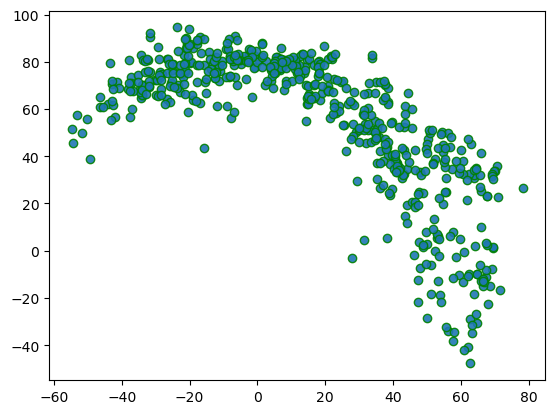

In [20]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.9, edgecolors="g")

date = datetime.now()
date = date.strftime("%m-%d-%Y")

#other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

NameError: name 'date' is not defined

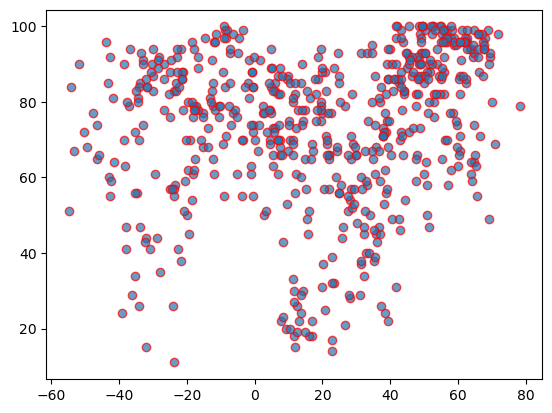

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.7, edgecolors="r")

#Format date from UTC to m/d/y
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (%) ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

NameError: name 'date' is not defined

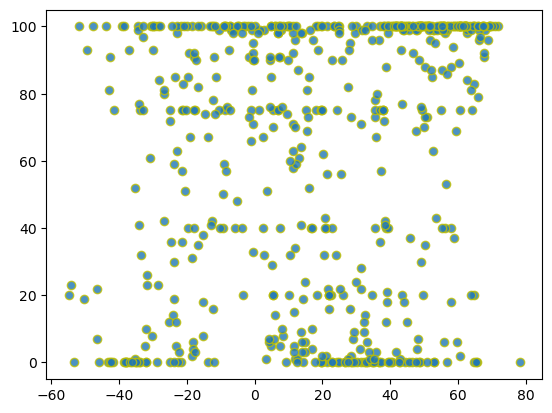

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.8, edgecolors="y")

date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

NameError: name 'datetime' is not defined

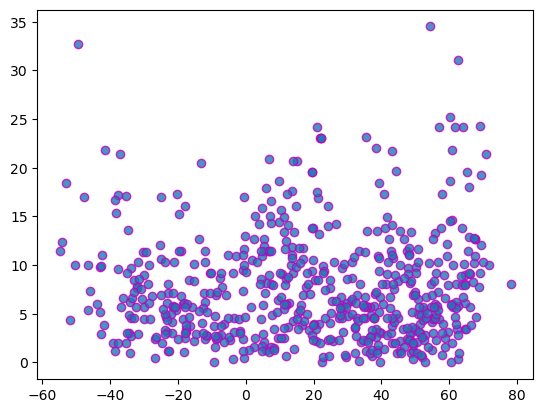

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, edgecolors="m")

#Format date from UTC to m/d/y
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,khandyga,62.6667,135.6000,-36.78,97,98,0.36,RU,1706495682
3,tiksi,71.6872,128.8694,-11.02,98,100,10.00,RU,1706495682
4,mizdah,31.4451,12.9801,48.02,93,0,8.66,LY,1706495682
5,aleysk,52.4926,82.7822,-5.60,100,99,5.41,RU,1706495682
6,maple glen,40.0156,-79.9767,39.00,94,100,3.00,US,1706495683


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,bredasdorp,-34.5322,20.0403,65.71,81,100,3.02,ZA,1706495682
2,papatowai,-46.5619,169.4708,64.71,65,22,5.35,NZ,1706495682
7,port-aux-francais,-49.3500,70.2167,40.48,68,93,32.68,TF,1706495683
10,west island,-12.1568,96.8225,84.18,65,16,10.36,CC,1706495683
12,daru,-9.0763,143.2092,91.24,55,59,4.74,PG,1706495684


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8456079471141248
-----------------------------------


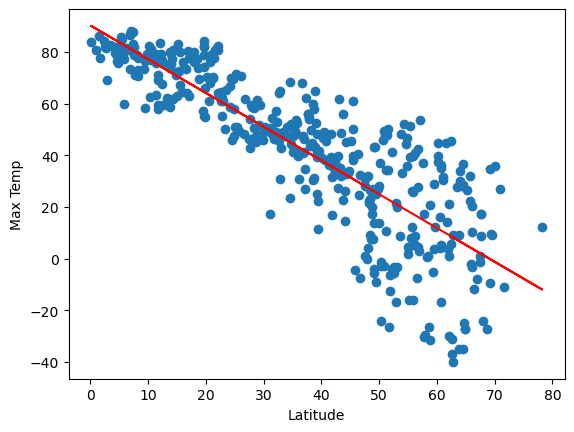

In [26]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')

The r-value is 0.43665165103070025
-----------------------------------


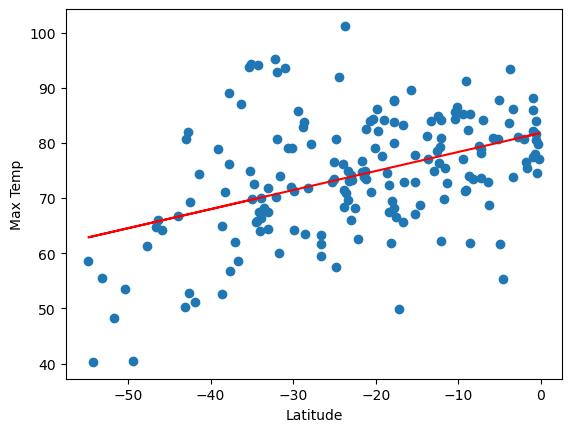

In [25]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.4257846018166777


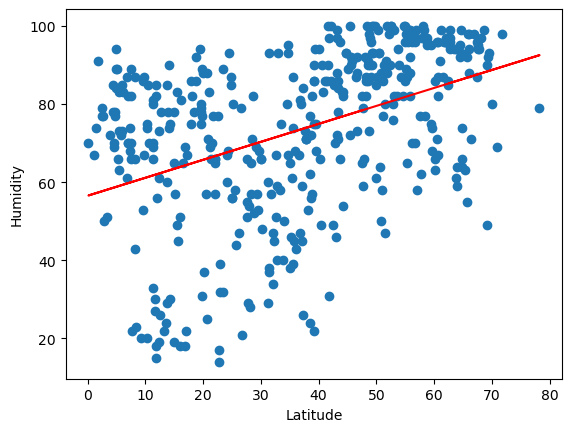

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')

The r-value is 0.2384505542135346


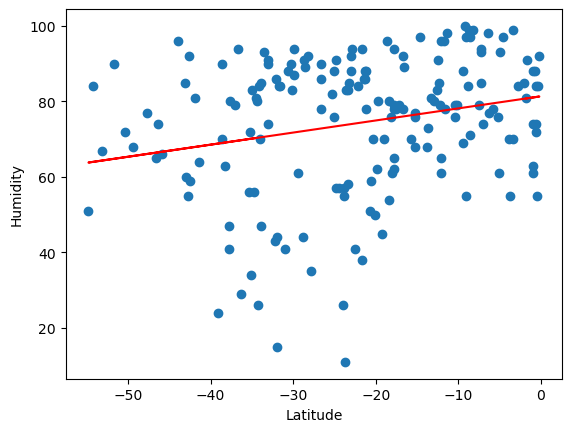

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.27224956101457015


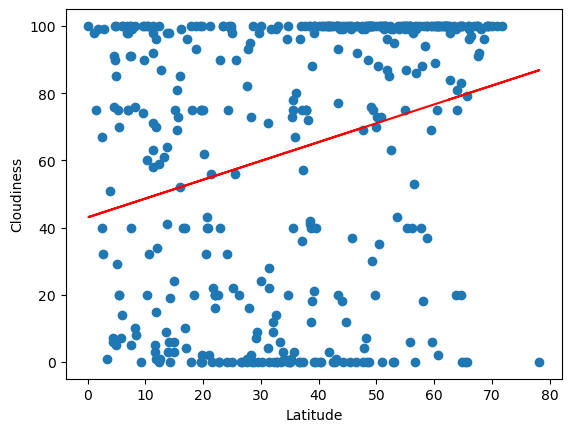

In [31]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')

The r-value is 0.36883576777777904


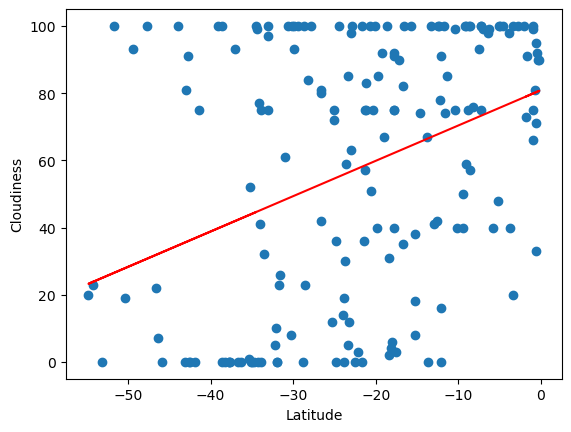

In [32]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.009483084018879252


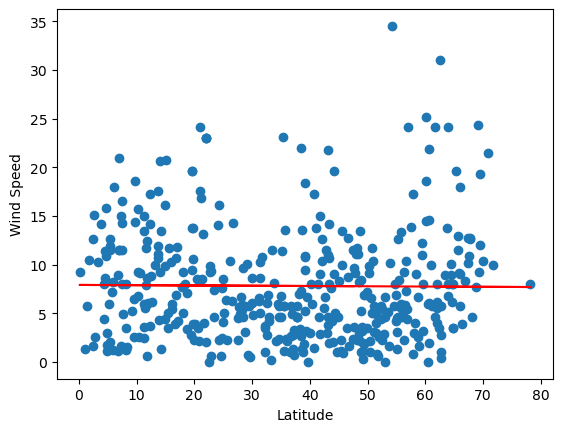

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')

The r-value is -0.2738395587643385


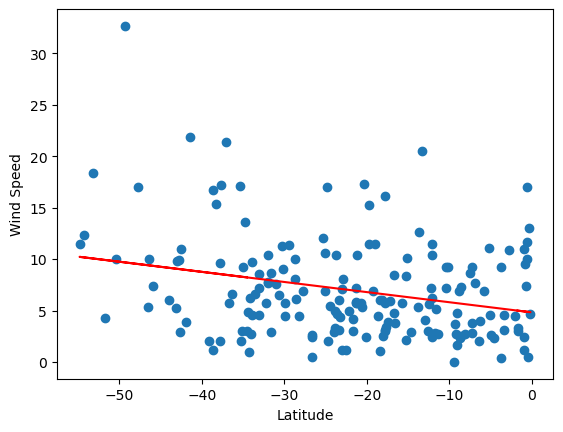

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE